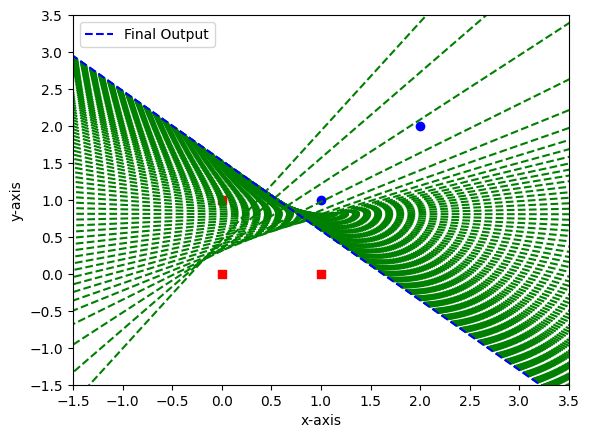

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Input and expected output data
x1 = np.array([0, 0, 1, 1, 2])
x2 = np.array([0, 1, 0, 1, 2])
t_output = np.array([0, 0, 0, 1, 1])

# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Initializing the values
w1, w2, w = np.random.uniform(-2.0, 2.0, size=3)
learning_rate = 0.5
max_iterations = 100
threshold = 0.1

# Plot graph
k = np.linspace(-4, 4, num=100)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axis([-1.5, 3.5, -1.5, 3.5])
plt.xticks(np.arange(-1.5, 3.6, 0.50))
plt.yticks(np.arange(-1.5, 3.6, 0.50))

positive_points = plt.scatter(x1[t_output == 1], x2[t_output == 1], c='blue', marker='o')
negative_points = plt.scatter(x1[t_output == 0], x2[t_output == 0], c='red', marker='s')

# to store all the outputs
lines = []

# Training 
for i in range(max_iterations):
    u = w1 * x1 + w2 * x2 + w
    o = sigmoid(u)
    error = t_output - o
    dw1 = learning_rate * np.dot(x1, error * o * (1 - o))
    dw2 = learning_rate * np.dot(x2, error * o * (1 - o))
    dw = learning_rate * np.sum(error * o * (1 - o))
    w1 += dw1
    w2 += dw2
    w += dw

    if np.allclose([dw1, dw2, dw], 0):
        break

    # Calculate line equation and store it
    l = -w1 * k / w2 - w / w2
    lines.append(l)

# Plot all the lines
for idx, line in enumerate(lines):
    if idx == len(lines) - 1:
        plt.plot(k, line, 'b--', label='Final Output')
    else:
        plt.plot(k, line, 'g--')
    #plt.pause(0.5)

plt.legend()
plt.show()
